# Red cell counter (Granulometry)

Using morphological operators

In [128]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Util

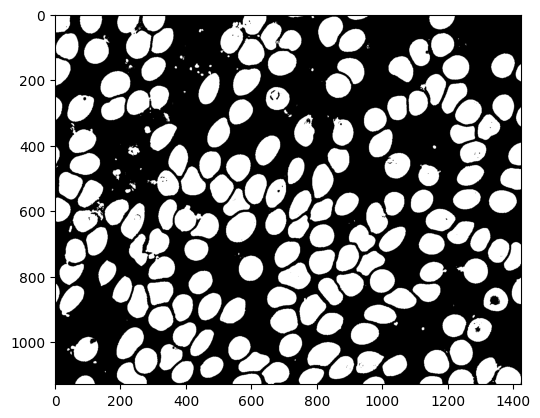

In [129]:
image = cv2.imread("../../images/BloodCells.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)
image = np.logical_not(image)
#image = cv2.bitwise_not(image)
plt.imshow(image, cmap="gray")


In [130]:
def within_image(img, coor):
    return coor[0] >= 0 and coor[0] < img.shape[0] and coor[1] >= 0 and coor[1] < img.shape[1]

In [131]:
def structural_array(structural_element, origin):
    c = []
    for i in range(structural_element.shape[0]):
        for j in range(structural_element.shape[1]):
            if structural_element[i,j]:
                c.append(np.subtract([i,j], origin))
    return c

## Morphological Operations

In [132]:
def dilate(img, struct_array):
    nImg = img.copy()
    h,w = img.shape
    for i in range(h):
        for j in range(w):
            trueCounter = 0
            for c in struct_array:
                u = np.add([i,j], c)
                if within_image(img, u) and img[u[0], u[1]]:
                    trueCounter += 1
            nImg[i, j] = trueCounter > 0
    return nImg

In [133]:
def erode(img, struct_array):
    nImg = img.copy()
    h,w = img.shape
    for i in range(h):
        for j in range(w):
            trueCounter = 0
            for c in struct_array:
                u = np.add([i,j], c)
                if within_image(img, u) and img[u[0], u[1]]:
                    trueCounter += 1 #Doesn't work for borders yet
            nImg[i, j] = trueCounter == struct_array.shape[0] 
    return nImg

In [134]:
def open(img, struct_array):
    eroded = erode(img, struct_array)
    dilated = dilate(eroded, struct_array)
    return dilated

In [135]:
def close(img, struct_array):
    dilated = dilate(img, struct_array)
    eroded = erode(dilated, struct_array)
    return eroded

# Main cell

In [136]:

h,w = image.shape

visited = np.zeros((h,w))
cells = []
dirs = [[-1, -1], [-1, 0], [-1, 1], [0, -1], [0, 1], [1, -1], [1, 0], [1, 1]]


def isVisited(index):
    if(visited[index[0], index[1]]):
        return True
    else:
        return False
        
def BFS(x,y,img): #coordenadas de inicio
    queue = []
    visited[x,y] = 1
    queue.append([x,y])
    while(queue):
        n = queue.pop(0)
        # print(n)
        for neighbour in dirs:
            f = neighbour[0] + n[0]
            s = neighbour[1] + n[1]
            if within_image(img, [f, s]):
                if img[f,s] == 1 and not isVisited([f,s]):
                    visited[f, s] = 1
                    queue.append([f,s])

def countCells(img):
    count = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] and not isVisited([i,j]):
                visited[i,j] = 1
                BFS(i,j, img)
                count+=1
    return count

In [137]:
np.unique(image)

array([False,  True])

## Count Cells

(3, 3)
----> Total cells:  229


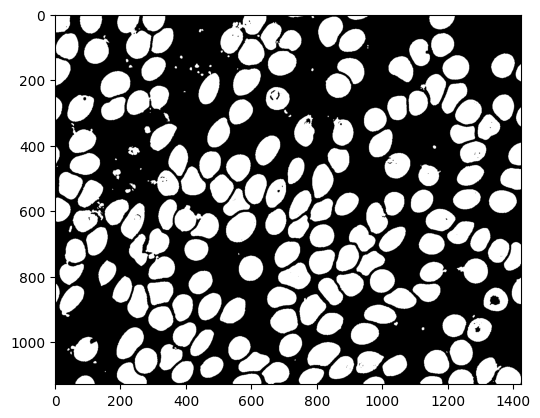

In [138]:
visited = np.zeros((h,w))
cells = []
dirs = [[-1, -1], [-1, 0], [-1, 1], [0, -1], [0, 1], [1, -1], [1, 0], [1, 1]]


structural = [
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
]                
structural = np.array(structural)
width = structural.shape[0]
print(structural.shape)

o = open(image, np.array(structural_array(structural, [1, 1])))
plt.imshow(o, cmap="gray")
# image = o
print("----> Total cells: ", countCells(o))

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
(5, 5)
----> Total cells:  202


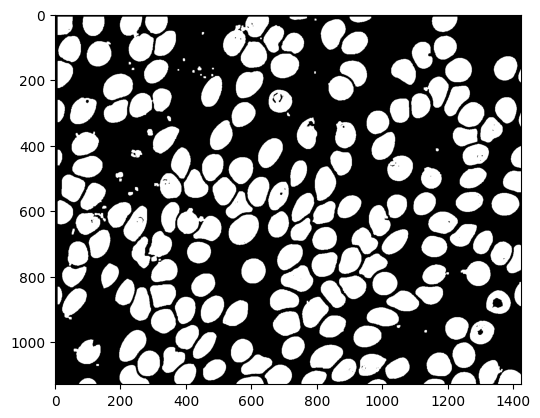

In [139]:
visited = np.zeros((h,w))
cells = []
dirs = [[-1, -1], [-1, 0], [-1, 1], [0, -1], [0, 1], [1, -1], [1, 0], [1, 1]]



structural = np.array(np.ones((5,5)))
print(structural)
width = structural.shape[0]
print(structural.shape)


o = open(image, np.array(structural_array(structural, [6, 6])))
plt.imshow(o, cmap="gray")
# image = o
print("----> Total cells: ", countCells(o))

(10, 10)
----> Total cells:  181


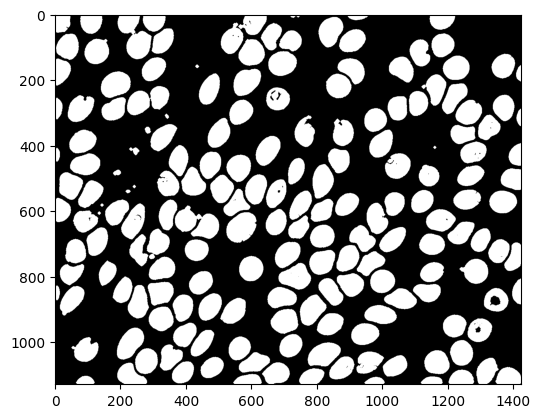

In [140]:
visited = np.zeros((h,w))
cells = []
dirs = [[-1, -1], [-1, 0], [-1, 1], [0, -1], [0, 1], [1, -1], [1, 0], [1, 1]]


structural = [  [0,0,0,0,1,1,0,0,0,0],
                [0,0,0,1,1,1,1,0,0,0],
                [0,0,1,1,1,1,1,1,0,0],
                [0,1,1,1,1,1,1,1,1,0],
                [1,1,1,1,1,1,1,1,1,1],
                [1,1,1,1,1,1,1,1,1,1],
                [0,1,1,1,1,1,1,1,1,0],
                [0,0,1,1,1,1,1,1,0,0],
                [0,0,0,1,1,1,1,0,0,0],
                [0,0,0,0,1,1,0,0,0,0]]
structural = np.array(structural)
width = structural.shape[0]
print(structural.shape)

o = open(image, np.array(structural_array(structural, [5, 5])))
plt.imshow(o, cmap="gray")
# image = o

print("----> Total cells: ", countCells(o))

(12, 12)
----> Total cells:  174


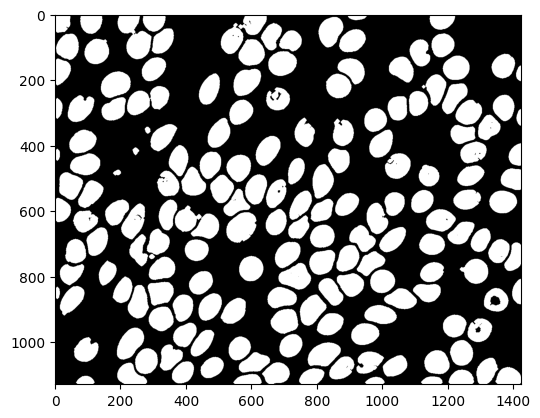

In [141]:
visited = np.zeros((h,w))
cells = []
dirs = [[-1, -1], [-1, 0], [-1, 1], [0, -1], [0, 1], [1, -1], [1, 0], [1, 1]]


structural = [  [0,0,0,0,0,1,1,0,0,0,0,0],
                [0,0,0,0,1,1,1,1,0,0,0,0],
                [0,0,0,1,1,1,1,1,1,0,0,0],
                [0,0,1,1,1,1,1,1,1,1,0,0],
                [0,1,1,1,1,1,1,1,1,1,1,0],
                [1,1,1,1,1,1,1,1,1,1,1,1],
                [1,1,1,1,1,1,1,1,1,1,1,1],
                [0,1,1,1,1,1,1,1,1,1,1,0],
                [0,0,1,1,1,1,1,1,1,1,0,0],
                [0,0,0,1,1,1,1,1,1,0,0,0],
                [0,0,0,0,1,1,1,1,0,0,0,0],
                [0,0,0,0,0,1,1,0,0,0,0,0]]
structural = np.array(structural)
width = structural.shape[0]
print(structural.shape)


o = open(image, np.array(structural_array(structural, [6, 6])))
plt.imshow(o, cmap="gray")
# image = o
print("----> Total cells: ", countCells(o))